# Plot simulation data

In [1]:
%matplotlib qt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.tri as tri

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dist = stats.norm(loc=600, scale=190)
dist_2 = stats.norm(loc=600, scale=100)
bounds = dist.cdf([0, 1200])
bounds_2 = dist_2.cdf([0, 1200])
# bounds = np.array([0., 1.])
# print(bounds)
pp = np.linspace(*bounds, num=200)
pp_2 = np.linspace(*bounds_2, num=200)
vals = dist.ppf(pp)
vals_2 = dist_2.ppf(pp_2)
# vals = dist.pdf(pp)
# print(vals - 600)

plt.title("wavelets distribution")
plt.plot(vals - 600, [1]*vals.size, 'o')
xs = np.linspace(0, 1200, 200)
plt.plot(xs - 600, 100*dist.pdf(xs))
plt.ylim(ymin=0)
plt.show()

200.0 0.16868653306034986 0.0001
[-2.00000000e+02 -1.90000000e+02 -1.80000000e+02 -1.70000000e+02
 -1.60000000e+02 -1.50000000e+02 -1.40000000e+02 -1.30000000e+02
 -1.20000000e+02 -1.10000000e+02 -1.00000000e+02 -9.00000000e+01
 -8.00000000e+01 -7.00000000e+01 -6.00000000e+01 -5.00000000e+01
 -4.00000000e+01 -3.00000000e+01 -2.00000000e+01 -1.00000000e+01
  0.00000000e+00  2.91587695e-02  2.33270156e-01  7.87286776e-01
  1.86616125e+00  3.64484619e+00  6.29829421e+00  1.00014579e+01
  1.49292900e+01  2.12567430e+01  2.91587695e+01  3.88103222e+01
  5.03863537e+01  6.40618166e+01  8.00116635e+01  9.84108471e+01
  1.19434320e+02  1.43257035e+02  1.70053944e+02  2.00000000e+02]


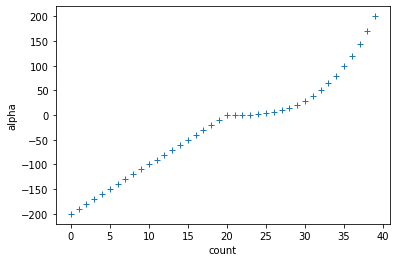

In [2]:
import numpy as np
import matplotlib.pyplot as plt


gamma = 100.0
alpha_max = 200.0/1e6*gamma**3.0
number_of_wavelets_pos = 20  # for positive alpha axis
number_of_wavelets_neg = 20   # for negative alpha axis

psi_max=(24.0*alpha_max/gamma**3.0)**(1.0/3.0)
psi_max_negative_axis = alpha_max/gamma**3.0/2.0

print(alpha_max, psi_max, psi_max_negative_axis)

psi_for_pos_axis = np.linspace(0.0, psi_max, number_of_wavelets_pos)
psi_for_neg_axis = np.linspace(psi_max_negative_axis, 0.0, number_of_wavelets_neg, endpoint=False)

alpha_axis = np.zeros(number_of_wavelets_pos + number_of_wavelets_neg)
alpha_axis[:number_of_wavelets_neg] = -psi_for_neg_axis*2.0
alpha_axis[number_of_wavelets_neg:] = psi_for_pos_axis**3.0/24.0

alpha_axis *= gamma**3.0


plt.plot(alpha_axis, "+")
plt.xlabel("count")
plt.ylabel("alpha")
print(alpha_axis)

In [9]:
# smoothing lengths
dist = stats.norm(loc=600, scale=190)
dist_2 = stats.norm(loc=600, scale=100)
bounds = dist.cdf([0, 2])
bounds_2 = dist_2.cdf([0, 2])

pp = np.linspace(*bounds, num=200)
pp_2 = np.linspace(*bounds_2, num=200)
vals = dist.ppf(pp)
vals_2 = dist_2.ppf(pp_2)
# vals = dist.pdf(pp)
print(vals - 600)

plt.title("wavelets distribution")
plt.plot(vals - 600, [1]*vals.size, 'o')
xs = np.linspace(0, 1200, 200)
plt.plot(xs - 600, 100*dist.pdf(xs))
plt.ylim(ymin=0)
plt.show()

[-600.         -599.9897819  -599.97956554 -599.96935091 -599.95913801
 -599.94892685 -599.93871741 -599.92850972 -599.91830375 -599.90809951
 -599.897897   -599.88769623 -599.87749718 -599.86729986 -599.85710426
 -599.8469104  -599.83671826 -599.82652785 -599.81633916 -599.80615219
 -599.79596695 -599.78578344 -599.77560164 -599.76542157 -599.75524322
 -599.74506659 -599.73489168 -599.72471849 -599.71454702 -599.70437727
 -599.69420924 -599.68404292 -599.67387832 -599.66371543 -599.65355426
 -599.64339481 -599.63323707 -599.62308104 -599.61292673 -599.60277413
 -599.59262324 -599.58247406 -599.57232659 -599.56218083 -599.55203679
 -599.54189445 -599.53175381 -599.52161489 -599.51147767 -599.50134216
 -599.49120836 -599.48107625 -599.47094586 -599.46081717 -599.45069018
 -599.44056489 -599.43044131 -599.42031943 -599.41019924 -599.40008076
 -599.38996398 -599.3798489  -599.36973551 -599.35962383 -599.34951384
 -599.33940555 -599.32929895 -599.31919405 -599.30909085 -599.29898933
 -599.

### Load data

In [5]:
data_folder="../../build/data/"
particleid="_0"
pos_x, pos_y = np.loadtxt(data_folder + 'wavefronts'+particleid+'.csv', delimiter=',', unpack=True)
traj_x, traj_y = np.loadtxt(data_folder + 'trajectory'+particleid+'.csv', delimiter=',', unpack=True)
m_pos_x, m_pos_y = np.loadtxt(data_folder + 'comoving_mesh_pos.csv', delimiter=',', unpack=True)
vfld, afld, tf = np.loadtxt(data_folder + 'field'+particleid+'.csv', delimiter=',', unpack=True)
atil, xtil ,tot= np.loadtxt(data_folder +'comoving_mesh_rad_ang.csv', delimiter=',', unpack=True)
vel_f, acc_f, tot_f = np.loadtxt(data_folder + 'comoving_mesh_field.csv', delimiter=',', unpack=True)
#a, x, tot = np.loadtxt('fields.csv', delimiter=',', unpack=True)

xmin = m_pos_x.min(); xmax = m_pos_x.max()
ymin = m_pos_y.min(); ymax = m_pos_y.max()

### Plot wavefronts

In [6]:
# 
ndir =200
nwavefront=3000
plot_every = 5
wave_x = pos_x.reshape([nwavefront,ndir]).transpose()
wave_y = pos_y.reshape([nwavefront,ndir]).transpose()
#lastwave_x=pos_x[16500:17000]
#lastwave_y=pos_y[16500:17000]

fig, ax= plt.subplots()

#ax.scatter(pos_x,pos_y, s=1, facecolor='lightseagreen', label="wavefronts")
#ax.scatter(lastwave_x,lastwave_y, s=1, facecolor='darkorange', label="last_time_step")

ax.plot(wave_x[:, ::plot_every],wave_y[:, ::plot_every],".:")
#ax.scatter(traj_x,traj_y, s=2, marker="+", facecolor='brown', label="trajectory")
# position centered at the time of emission
ax.scatter((traj_x+np.roll(traj_x,1))[1:]/2.0, (traj_y+np.roll(traj_y,1))[1:]/2.0, s=20, marker="+", facecolor='brown', label="trajectory")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('traj and wavefronts')
l = plt.legend(loc='upper right')
ax.grid(True)
plt.show()
plt.savefig('csr_wavefronts.png')


In [7]:
print(traj_x[-1],traj_y[-1])

0.294037916583 0.955809059105


### Plot mesh

In [8]:
firstwave_x = pos_x[:200]
firstwave_y = pos_y[:200]

fig, ax= plt.subplots()
ax.scatter(m_pos_x,m_pos_y, s=18, facecolor='orangered', label="Moving mesh")
ax.scatter(pos_x,pos_y, s=4, facecolor='teal', label="Wavefronts")
#ax.scatter(traj_x,traj_y, s=15, facecolor='black', label="Tracjectory")
ax.scatter((traj_x+np.roll(traj_x,1))[1:]/2.0, (traj_y+np.roll(traj_y,1))[1:]/2.0, s=20, marker="+", facecolor='brown', label="trajectory")
#ax.scatter(firstwave_x,firstwave_y, s=60, facecolor='orangered', label="First_time_step")
#ax.tick_params(labelsize=30)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
#plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Co-moving mesh with the wavefronts',fontsize=25)
l = plt.legend(loc='upper right')
ax.grid(True)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()
plt.savefig('csr_mesh.png')

### Plot field

In [9]:
gamma = 10
tf_n=tf/(gamma**4.0)
vf_n=vfld/(gamma**4.0)
af_n=afld/(gamma**4.0)
f_n = tf_n

fig, ax= plt.subplots()
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(pos_x, pos_y, tf_n,  marker='o')

cm = plt.cm.get_cmap('coolwarm')
#sc=ax.scatter(pos_x,pos_y,c=tf_n, marker='.',s=3,cmap=cm )

sc=ax.scatter(pos_x,pos_y,c=f_n,vmin=-6,vmax=6, marker='o',s=40,cmap=cm )
#sc=ax.scatter(pos_x,pos_y,c=f_n, marker='o',s=40,cmap=cm )
plt.colorbar(sc)           
#ax.set_facecolor('grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x')
plt.ylabel('y')
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
ax.tick_params(labelsize=30)
plt.title('Normalized total field',fontsize=25)
#plt.legend(loc='upper right', prop={'size': 25})
ax.grid(True)
plt.show()
plt.savefig('csr_circular_field.png')

### Plot interpolated field

In [10]:
gamma = 10
nr = 101; ntheta=101
tf_n=tot/(gamma**4.0)
vf_n=vel_f/(gamma**4.0)
af_n=acc_f/(gamma**4.0)
f_n = tf_n/100
f_n_arr = f_n.reshape([ntheta,nr]).transpose()
print(f_n.min(),f_n.max())

fig, ax= plt.subplots(1)

cm = plt.cm.get_cmap('coolwarm')
#coolwarm
#sc = ax.scatter( xtil, atil, c=f_n, vmin=-5, vmax=5, marker='.', s=5, cmap=cm ) 
#sc = ax.imshow( f_n_arr, vmin=-6, vmax=6, cmap=cm, aspect="auto",origin="upper" )
#sc = ax.imshow( f_n_arr, cmap=cm, aspect="auto" )
sc = ax.scatter(m_pos_x,m_pos_y, c=f_n, vmin=-6, vmax=6, marker='.', s=10, cmap=cm )
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.colorbar(sc)
ax.set_facecolor('grey' )
plt.xlabel('x')
plt.ylabel('y')
plt.title('field on the mesh ')
#l = plt.legend(loc='upper right')
ax.grid(True)
plt.show()
plt.savefig('csr_mesh_field_rad_ang.png')

-0.04 0.0


### Benchmark

In [12]:
fig=plt.figure(1)
gamma=10
tf_n=tot/-gamma**4
a=-a/180*np.pi
x=x
cm = plt.cm.get_cmap('coolwarm')
#sc = ax.scatter(x, a, c=tf_n, marker='o', s=5, cmap=cm ) 
#sc = plt.scatter(a, x, c=tf_n, vmin=-10, vmax=10, marker='o', s=1, cmap=cm )
sc = plt.scatter(a, x, c=tf_n, marker='o', s=1, cmap=cm )
#ax = fig.add_subplot(111)
plt.colorbar(sc)
#ax.set_facecolor('grey' )
xx=0.005
aa=0.0005
plt.ylim([-xx,xx]) 
plt.xlim([-aa,aa])
plt.ylabel('x')
plt.xlabel('a')
#plt.title('field on the wavefronts')
#l = plt.legend(loc='upper right')
plt.grid(True)
#plt.show()
#plt.savefig('csr_mesh_field.png')

# define grid.
#pos =np.array([x, a]).T
#grid_x, grid_a = np.mgrid[-0.05:0.05:500j, -0.005:0.005:500j]
#grid_z0 = griddata( pos, tf_n, (grid_x, grid_a), method='nearest')

plt.figure(2)
# define grid.                                                                                                                                                                      
#xi = np.linspace(-0.01,0.01,100)
#ai = np.linspace(-0.01,0.01,100)
xi = np.linspace(-0.005,0.005,100)
ai = np.linspace(-0.0005,0.0005,100)
pos =np.array([a, x]).T
# grid the data.
zi = griddata((a, x), tf_n, (ai[None,:], xi[:,None]), method='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
levels = np.linspace(-10.0, 10.0, 11)
CS = plt.contour(ai,xi,zi,levels=levels,linewidths=0.7,colors='k')
CS = plt.contourf(ai,xi,zi,levels=levels, cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
#plt.scatter(x,a,marker='o',c='b',s=1)
plt.ylim(-xx,xx)
plt.xlim(-aa,aa)
#plt.title('griddata test (%d points)' % npts)
plt.show()

NameError: name 'a' is not defined